## Session6 - playground (optional)

Here you can try doing the full machine learning workflow by yourself.

You are free to use any dataset (but make sure it is a classification problem).
<br>
A good place to find datasets for trying out is the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). 
<br>
Other places to look for datasets are [Kaggle](https://www.kaggle.com/datasets), [Amazon AWS](https://registry.opendata.aws/), or check the [list on Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research).

(Note that some datasets might not be in CSV format, so you may have to to preprocess the data.)

ここでは、最初から最後までの機械学習ワークフローを自分で試すことができます。

任意のデータセットを自由に使用できます（ただし、分類問題であることを確認してください）。
<br>
練習用のデータセットを見つけるのに適した場所は、 [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php)です。
<br>
それ以外、データセットを探す場所は、 [Kaggle](https://www.kaggle.com/datasets)、[Amazon AWS](https://registry.opendata.aws/)などがあります。または[ウィキペディアのリスト](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)を確認してください。

（データセットはCSV形式でない場合があるため、データの前処理が必要になる場合があります。）

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## OPTIONAL 1 - Get the data / データの取得

- Download the data file to the same folder as this notebook (.../day1/)
- Load the data


- データファイルをこのノートブックと同じフォルダにダウンロード（.../day1/）
- データの読み込み

In [38]:
df = pd.read_csv('pulsar_stars.csv', index_col=0)

df.columns

Index([' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

## OPTIONAL 2 - Explore the data / データの探索

- Try plotting some values to see how the dataset looks like


- いくつかの値をプロットし、データがどのように見えるかを確認してください

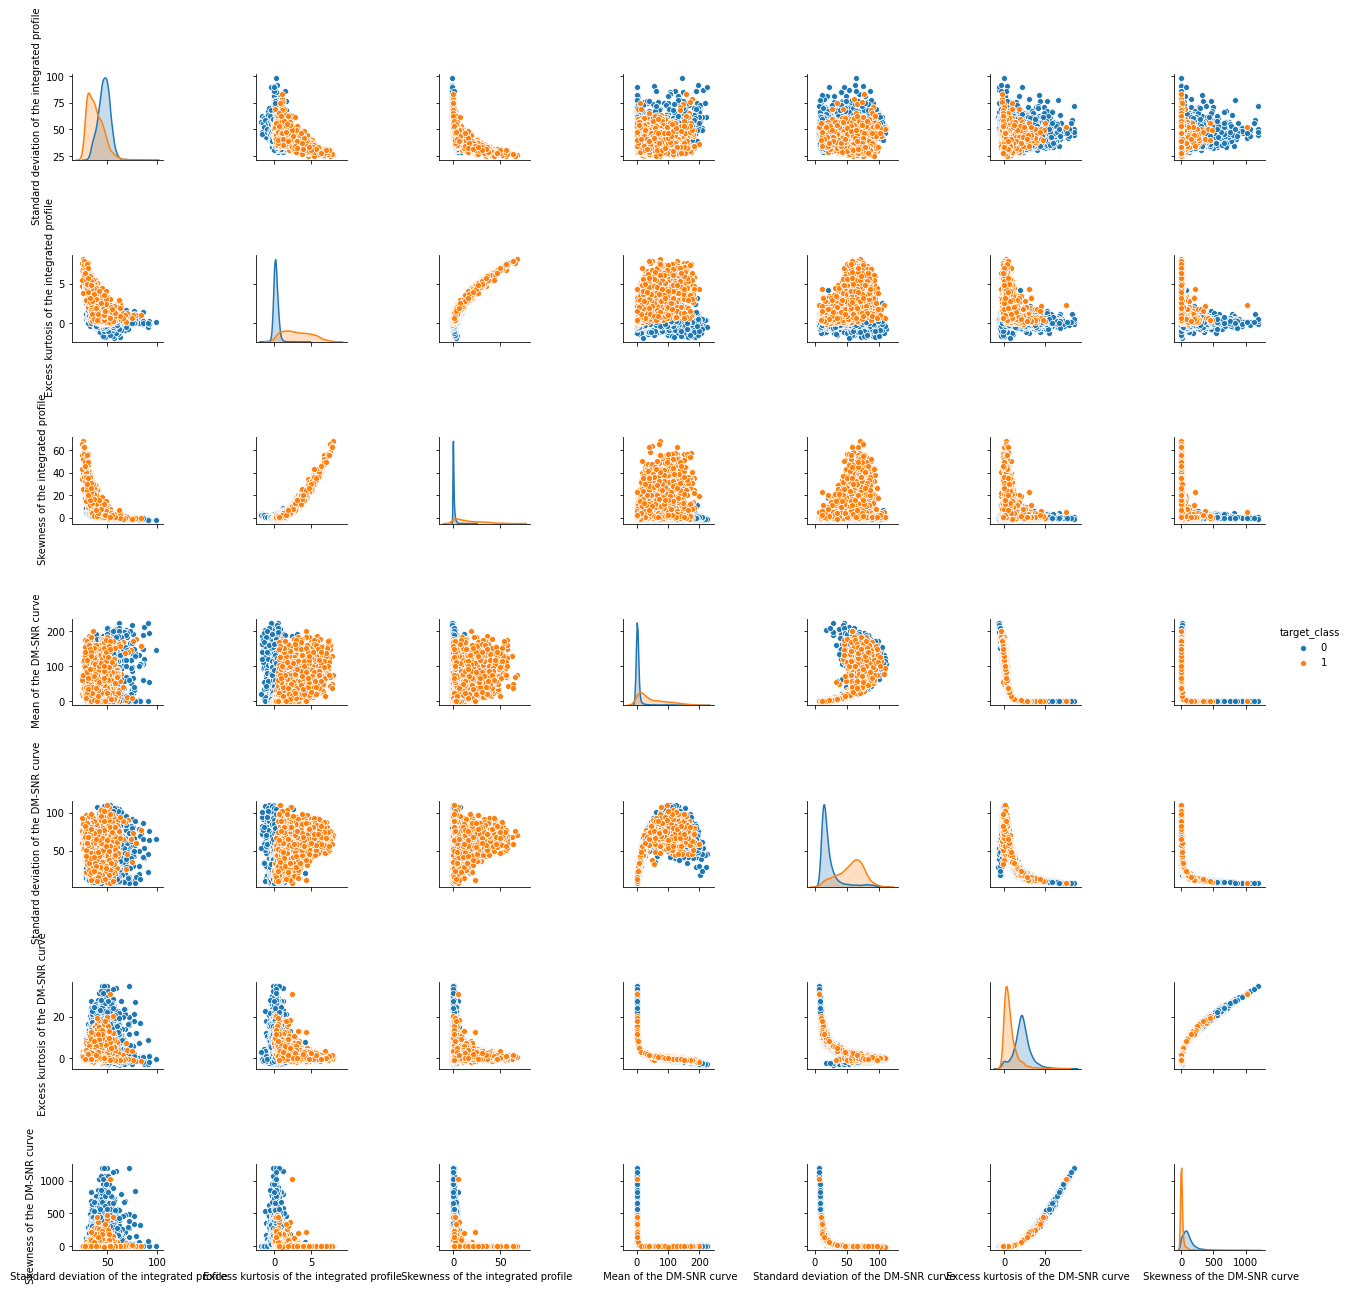

In [40]:
sns.pairplot(df, hue='target_class')
plt.show()

## OPTIONAL 3 - Prepare the data / データの準備

- Create a training and a testing set
- Standardize the data


- トレーニングとテストセットの作成
- データの標準化

In [35]:
datas = df.values

x = datas[:, :-1]
y = datas[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.3)

print("X train size:", X_train.shape[0], "  X test size:", X_test.shape[0])

# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X train size: 12528   X test size: 5370


## OPTIONAL 4 - Try several classifiers / いくつかの分類器を試す

- Suggestions: `LogisticRegression` or `SGDClassifier` from the `sklearn.linear_model` package, or `RandomForestClassifier` from the `sklearn.ensemble` package, etc.


- 提案：`sklearn.linear_model`パッケージ内の`LogisticRegression`か`SGDClassifier`、または`sklearn.ensemble`パッケージの`RandomForestClassifier`など

In [65]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_lr_pred)
print(CM)

[[4858   29]
 [  89  394]]


In [67]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test,  y_lr_pred)
print("Accuracy = ", A)

Accuracy =  0.9780260707635009


In [68]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier
sdg = SGDClassifier()
sdg.fit(X_train, y_train)
y_sdg_pred = sdg.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_sdg_pred)
print(CM)

[[4851   36]
 [  77  406]]


In [70]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test,  y_sdg_pred)
print("Accuracy = ", A)

Accuracy =  0.9789571694599628


## OPTIONAL 5 - Make more detailed comparisons / より詳細な比較を行う

- Use cross validation to get a better idea of the performance of the different classifiers 
- Measure the computation time of each classifier


- 相互検証を使用して、さまざまな分類器のパフォーマンスをよりよく理解する
- それぞれの分類器の計算時間を測定する

In [92]:
from sklearn.model_selection import cross_validate

# Reloal the dataset
X = x
y = y

lr = LogisticRegression(max_iter=10000)

number_of_parts = 5

A = cross_validate(lr, X, y, cv=number_of_parts, scoring="accuracy")
for i in range(number_of_parts):
    print('## number {}'.format(i))
    print('fit_time: {:.4f}'.format(A['fit_time'][i]))
    print('score_time: {:.4f}'.format(A['score_time'][i]))
    print('test_score: {:.4f}'.format(A['test_score'][i]))
    print('')

## number 0
fit_time: 0.1033
score_time: 0.0005
test_score: 0.9743

## number 1
fit_time: 0.0826
score_time: 0.0005
test_score: 0.9796

## number 2
fit_time: 0.0880
score_time: 0.0005
test_score: 0.9816

## number 3
fit_time: 0.0669
score_time: 0.0004
test_score: 0.9779

## number 4
fit_time: 0.0699
score_time: 0.0005
test_score: 0.9776



In [93]:
from sklearn.model_selection import cross_validate

# Reloal the dataset
X = x
y = y

sdg = SGDClassifier(max_iter=10000)

number_of_parts = 5

A = cross_validate(sdg, X, y, cv=number_of_parts, scoring="accuracy")
for i in range(number_of_parts):
    print('## number {}'.format(i))
    print('fit_time: {:.4f}'.format(A['fit_time'][i]))
    print('score_time: {:.4f}'.format(A['score_time'][i]))
    print('test_score: {:.4f}'.format(A['test_score'][i]))
    print('')

## number 0
fit_time: 0.0480
score_time: 0.0008
test_score: 0.9520

## number 1
fit_time: 0.0503
score_time: 0.0005
test_score: 0.9701

## number 2
fit_time: 0.0318
score_time: 0.0005
test_score: 0.9726

## number 3
fit_time: 0.0220
score_time: 0.0005
test_score: 0.9603

## number 4
fit_time: 0.0430
score_time: 0.0005
test_score: 0.9729

